In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("AprioriDataSet.csv")
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Wine,Chips,Bread,Butter,Milk,Apple
1,NaN,Wine,NaN,Bread,Butter,Milk,NaN
2,NaN,NaN,NaN,Bread,Butter,Milk,NaN
3,NaN,NaN,Chips,NaN,NaN,NaN,Apple
4,NaN,Wine,Chips,Bread,Butter,Milk,Apple


In [3]:
items=set()
for i in data:
    items.update(data[i].dropna().unique())
    

In [4]:
items

{'Apple', 'Bread', 'Butter', 'Chips', 'Milk', 'Wine'}

In [5]:

itemset = set(items)
endor_data=[]
for index,row in data.iterrows():
    rowset = set(row)
    uncomman = list(itemset-rowset)
    coman = list(itemset.intersection(rowset))
    label={}
    for un in uncomman:
        label[un]=0
    for cn in coman:
        label[cn]=1
        
    endor_data.append(label)

In [6]:
newdata = pd.DataFrame(endor_data)
newdata.head()

,Apple,Bread,Chips,Butter,Wine,Milk
0,1,1,1,1,1,1
1,0,1,0,1,1,1
2,0,1,0,1,0,1
3,1,0,1,0,0,0
4,1,1,1,1,1,1


In [7]:
freq = apriori(newdata,min_support=0.5,use_colnames=True)
freq

,support,itemsets
0,0.785714,(Apple)
1,0.714286,(Bread)
2,0.714286,(Chips)
3,0.714286,(Butter)
4,0.714286,(Wine)
5,0.857143,(Milk)
6,0.500000,"(Apple, Bread)"
7,0.642857,"(Apple, Chips)"
8,0.500000,"(Apple, Butter)"
9,0.571429,"(Apple, Wine)"


In [10]:
rules = association_rules(freq,metric="confidence",min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Apple),(Bread),0.785714,0.714286,0.500000,0.636364,0.890909,-0.061224,0.785714,-0.363636
1,(Bread),(Apple),0.714286,0.785714,0.500000,0.700000,0.890909,-0.061224,0.714286,-0.300000
2,(Apple),(Chips),0.785714,0.714286,0.642857,0.818182,1.145455,0.081633,1.571429,0.592593
3,(Chips),(Apple),0.714286,0.785714,0.642857,0.900000,1.145455,0.081633,2.142857,0.444444
4,(Apple),(Butter),0.785714,0.714286,0.500000,0.636364,0.890909,-0.061224,0.785714,-0.363636


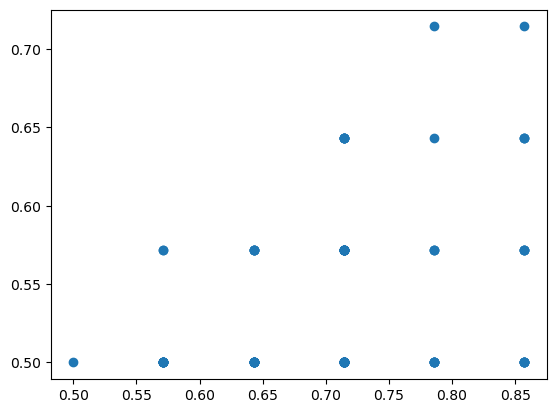

In [11]:
plt.scatter(rules["consequent support"],rules["support"])